In [ ]:
#vdb_data=pd.read_csv("E:\\hachathon\\Kosovo_VPD\\Kosovo_VPD\\Kosovo_VPD.csv")

In [62]:
#pip install folium branca matplotlib mapclassify


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
import laspy
from shapely.geometry import Point ,Polygon

In [7]:
prob_data_w1=pd.read_csv("E:\\hachathon\\Kosovo_HPD\\Kosovo_HPD\\XKO_HPD_week_1.csv")
prob_data_w2=pd.read_csv("E:\\hachathon\\Kosovo_HPD\\Kosovo_HPD\\XKO_HPD_week_2.csv")

In [205]:
prob_data_w1.describe()

,heading,latitude,longitude,speed,day
count,310211.000000,314660.000000,314660.000000,306302.000000,314660.000000
mean,170.544114,42.642930,21.144174,31.143078,3.748621
std,103.083211,0.024519,0.025781,30.951792,1.891761
min,1.000000,42.561036,21.082764,1.000000,1.000000
25%,75.000000,42.631280,21.128386,8.000000,2.000000
50%,179.000000,42.648197,21.150792,21.000000,4.000000
75%,250.000000,42.658964,21.163821,43.000000,5.000000
max,359.000000,42.681884,21.192619,181.000000,7.000000


In [11]:
prob_data_w1.info()

<class 'pandas.DataFrame'>
RangeIndex: 314660 entries, 0 to 314659
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   heading    310211 non-null  float64
 1   latitude   314660 non-null  float64
 2   longitude  314660 non-null  float64
 3   traceid    314660 non-null  str    
 4   speed      306302 non-null  float64
 5   day        314660 non-null  int64  
 6   time       314660 non-null  str    
dtypes: float64(4), int64(1), str(2)
memory usage: 16.8 MB


In [158]:
prob_data_w2.info()

<class 'pandas.DataFrame'>
RangeIndex: 299073 entries, 0 to 299072
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   heading    294978 non-null  float64
 1   latitude   299073 non-null  float64
 2   longitude  299073 non-null  float64
 3   traceid    299073 non-null  str    
 4   speed      291643 non-null  float64
 5   day        299073 non-null  int64  
 6   time       299073 non-null  str    
dtypes: float64(4), int64(1), str(2)
memory usage: 16.0 MB


In [27]:
print(f"The max value at weak one of heading is : {prob_data_w1["heading"].max()}")
print(f"The max value at weak two of heading is : {prob_data_w2["heading"].max()}")

The max value at weak one of heading is : 359.0
The max value at weak two of heading is : 359.0


In [29]:
print(f"The min value at weak one of heading is : {prob_data_w1["heading"].min()}")
print(f"The min value at weak two of heading is : {prob_data_w1["heading"].min()}")

The min value at weak one of heading is : 1.0
The min value at weak two of heading is : 1.0


# Explore data

In [75]:
prob_data_w1.head()

,heading,latitude,longitude,traceid,speed,day,time
0,288.0,42.622486,21.089626,4f47d8e6eef3739c0fd0441ec905de2c,82.0,1,02:00:13
1,316.0,42.623863,21.084513,4f47d8e6eef3739c0fd0441ec905de2c,22.0,1,02:00:42
2,344.0,42.623960,21.084440,4f47d8e6eef3739c0fd0441ec905de2c,21.0,1,02:00:44
3,20.0,42.624130,21.084454,4f47d8e6eef3739c0fd0441ec905de2c,25.0,1,02:00:47
4,46.0,42.624233,21.084543,4f47d8e6eef3739c0fd0441ec905de2c,23.0,1,02:00:49


In [83]:
prob_data_w1["day"].value_counts().sort_index()


day
1    45992
2    55218
3    43816
4    52674
5    51736
6    34279
7    30945
Name: count, dtype: int64

In [91]:
print(f"The total data points on W1 is : {prob_data_w1["day"].count()}")
print(f"The total data points on W2 is : {prob_data_w2["day"].count()}")

The total data points on W1 is : 314660
The total data points on W2 is : 299073


In [162]:
prob_data_w2.head()

,heading,latitude,longitude,traceid,speed,day,time
0,336.0,42.631524,21.099093,696320653547d6d69f6dd7a76d91d76d,13.0,1,05:20:09
1,16.0,42.632328,21.099613,696320653547d6d69f6dd7a76d91d76d,1.0,1,05:20:16
2,40.0,42.632332,21.099619,696320653547d6d69f6dd7a76d91d76d,2.0,1,05:20:17
3,52.0,42.632332,21.099622,696320653547d6d69f6dd7a76d91d76d,1.0,1,05:20:18
4,52.0,42.632343,21.099631,696320653547d6d69f6dd7a76d91d76d,1.0,1,05:20:24


# if your traceied is lesthan 5 then it's a Nois because it isn't give us meaning of exact trip

In [165]:
prob_data_w1["traceid"].value_counts().sort_values(ascending=False)


traceid
76e02c34e884aed1b360dfa53ad0736f    1271
19301c044f6515f14a7c96561cead0af    1217
c1a51f269d0d4eae73cad979ff33157a    1140
bf8b99edce559128e9565a6a2e630c3b    1116
dd41ea9f4d9da5b37fff852b6b98dbe8    1109
                                    ... 
6191555ce60c44088293887f6aeb15d1       1
98d41d1566bbe5d65f7d30c16ccf1e4d       1
ff06e0e0d719d3e663db2430ec839b81       1
0845cfb87badb42cdf04ed80d4064142       1
2e6c03b7892afc6f4724e037e818137e       1
Name: count, Length: 2830, dtype: int64

In [167]:
prob_data_w2["traceid"].value_counts().sort_values(ascending=False)

traceid
4605e4cf4b9be24eb8c143ccb82cbb4b    1256
54cfb11a7afee2c16b5b469f7eb4d9d4    1218
8b218006ad475f4d48a453637dc93dbc    1208
ab530ec3f9ca16cfb71c2d614c522fb7    1207
6ba35fc967df3d8a6d5a1b4b1f1c6298    1197
                                    ... 
b1391153a90072d1286d099883487c04       1
9ccd5196be533df4996aba9ee811ba00       1
66cf708ca149de6099f17c95e8b97f72       1
99f141839f97e519d02e30453de25e68       1
a31d55a18586538ec48e92db15fed16c       1
Name: count, Length: 3097, dtype: int64

In [178]:
# then let's remove noise
mask=prob_data_w1["traceid"].value_counts()
valid_ids=mask[mask>5].index
new_prob_data_w1= prob_data_w1[prob_data_w1["traceid"].isin(valid_ids)]

In [180]:
new_prob_data_w1

,heading,latitude,longitude,traceid,speed,day,time
0,288.0,42.622486,21.089626,4f47d8e6eef3739c0fd0441ec905de2c,82.0,1,02:00:13
1,316.0,42.623863,21.084513,4f47d8e6eef3739c0fd0441ec905de2c,22.0,1,02:00:42
2,344.0,42.623960,21.084440,4f47d8e6eef3739c0fd0441ec905de2c,21.0,1,02:00:44
3,20.0,42.624130,21.084454,4f47d8e6eef3739c0fd0441ec905de2c,25.0,1,02:00:47
4,46.0,42.624233,21.084543,4f47d8e6eef3739c0fd0441ec905de2c,23.0,1,02:00:49
...,...,...,...,...,...,...,...
314655,76.0,42.624320,21.084710,e769dc63e825c6a4e6d148e6cb2f6fd0,30.0,7,20:43:56
314656,110.0,42.624302,21.084904,e769dc63e825c6a4e6d148e6cb2f6fd0,26.0,7,20:43:58
314657,150.0,42.624172,21.085054,e769dc63e825c6a4e6d148e6cb2f6fd0,31.0,7,20:44:00
314658,188.0,42.624000,21.085089,e769dc63e825c6a4e6d148e6cb2f6fd0,35.0,7,20:44:02


In [184]:
mask2=prob_data_w2["traceid"].value_counts()
valid_ids2=mask2[mask2>5].index
new_prob_data_w2= prob_data_w2[prob_data_w2["traceid"].isin(valid_ids2)]

In [186]:
new_prob_data_w2

,heading,latitude,longitude,traceid,speed,day,time
0,336.0,42.631524,21.099093,696320653547d6d69f6dd7a76d91d76d,13.0,1,05:20:09
1,16.0,42.632328,21.099613,696320653547d6d69f6dd7a76d91d76d,1.0,1,05:20:16
2,40.0,42.632332,21.099619,696320653547d6d69f6dd7a76d91d76d,2.0,1,05:20:17
3,52.0,42.632332,21.099622,696320653547d6d69f6dd7a76d91d76d,1.0,1,05:20:18
4,52.0,42.632343,21.099631,696320653547d6d69f6dd7a76d91d76d,1.0,1,05:20:24
...,...,...,...,...,...,...,...
299068,106.0,42.624290,21.084827,74e49e03e15a06ccbbd783e92cf11b6c,24.0,8,18:08:20
299069,134.0,42.624226,21.084965,74e49e03e15a06ccbbd783e92cf11b6c,25.0,8,18:08:22
299070,162.0,42.624115,21.085050,74e49e03e15a06ccbbd783e92cf11b6c,26.0,8,18:08:24
299071,190.0,42.623980,21.085056,74e49e03e15a06ccbbd783e92cf11b6c,26.0,8,18:08:26


In [188]:
print(f" the number of worth number of roads is : ---> {len(new_prob_data_w1["traceid"].value_counts())}")

 the number of worth number of roads is : ---> 2374


In [190]:
new_prob_data_w2.info()

<class 'pandas.DataFrame'>
Index: 297489 entries, 0 to 299072
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   heading    293883 non-null  float64
 1   latitude   297489 non-null  float64
 2   longitude  297489 non-null  float64
 3   traceid    297489 non-null  str    
 4   speed      290311 non-null  float64
 5   day        297489 non-null  int64  
 6   time       297489 non-null  str    
dtypes: float64(4), int64(1), str(2)
memory usage: 18.2 MB


In [192]:
new_prob_data_w1.info()

<class 'pandas.DataFrame'>
Index: 313174 entries, 0 to 314659
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   heading    309199 non-null  float64
 1   latitude   313174 non-null  float64
 2   longitude  313174 non-null  float64
 3   traceid    313174 non-null  str    
 4   speed      305044 non-null  float64
 5   day        313174 non-null  int64  
 6   time       313174 non-null  str    
dtypes: float64(4), int64(1), str(2)
memory usage: 19.1 MB


# remove noise by  boundaries 

In [201]:
#Kosovo:
#[21.088588, 42.571255, 21.188588, 42.671255]
boubdary_mask=((new_prob_data_w1['longitude']>21.088588)&(new_prob_data_w1['longitude']<21.188588))&((new_prob_data_w1['latitude']>42.571255)&(new_prob_data_w1['latitude']<42.671255))
new_prob_data_w1 =new_prob_data_w1[boubdary_mask]

In [300]:
new_prob_data_w1.to_csv(
    r"E:\\hachathon\\new_probe_data_w1.csv",
    index=False
)

In [304]:
new_prob_data_w2.to_csv(
    r"E:\\hachathon\\new_probe_data_w2.csv",
    index=False
)

In [270]:
prob_data_w1["timestamp"] = pd.to_datetime(prob_data_w1["time"])


C:\Users\hp\AppData\Local\Temp\ipykernel_14408\2868506495.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  prob_data_w1["timestamp"] = pd.to_datetime(prob_data_w1["time"])


In [271]:
prob_data_w1 = prob_data_w1.sort_values(["traceid", "timestamp"])

In [274]:
prob_data_w1["prev_lat"] = prob_data_w1.groupby("traceid")["latitude"].shift()
prob_data_w1["prev_lon"] = prob_data_w1.groupby("traceid")["longitude"].shift()
prob_data_w1["prev_time"] = prob_data_w1.groupby("traceid")["timestamp"].shift()


In [276]:
prob_data_w1["time_diff_sec"] = (
    prob_data_w1["timestamp"] - prob_data_w1["prev_time"]
).dt.total_seconds()


In [278]:
R = 6371000  

lat1 = np.radians(prob_data_w1["prev_lat"])
lon1 = np.radians(prob_data_w1["prev_lon"])
lat2 = np.radians(prob_data_w1["latitude"])
lon2 = np.radians(prob_data_w1["longitude"])

dlat = lat2 - lat1
dlon = lon2 - lon1

a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
c = 2 * np.arcsin(np.sqrt(a))

prob_data_w1["distance_m"] = R * c

In [280]:
prob_data_w1["calculated_speed_mps"] = (
    prob_data_w1["distance_m"] / prob_data_w1["time_diff_sec"]
)


In [282]:
prob_data_w1 = prob_data_w1[prob_data_w1["time_diff_sec"] > 0]


In [284]:
prob_data_w1["calculated_speed_kmh"] = (
    prob_data_w1["calculated_speed_mps"] * 3.6
)


In [286]:
prob_data_w1["speed"].describe()

count    298814.000000
mean         31.437436
std          30.968457
min           1.000000
25%           8.000000
50%          21.000000
75%          43.000000
max         181.000000
Name: speed, dtype: float64

# making Analysis of null speed

In [311]:
new_prob_data_w1.head()

,heading,latitude,longitude,traceid,speed,day,time
0,288.0,42.622486,21.089626,4f47d8e6eef3739c0fd0441ec905de2c,82.0,1,02:00:13
28,110.0,42.622480,21.089305,d53b08ce128c4879c02793f934ec6d59,79.0,1,02:34:50
29,157.0,42.644263,21.092515,d53b08ce128c4879c02793f934ec6d59,14.0,1,02:24:19
30,145.0,42.643392,21.093057,d53b08ce128c4879c02793f934ec6d59,30.0,1,02:24:32
31,157.0,42.642988,21.093420,d53b08ce128c4879c02793f934ec6d59,32.0,1,02:24:38


In [333]:
#convert type of time
new_prob_data_w1["measuring_time"]=pd.to_datetime(new_prob_data_w1["time"],format="%H:%M:%S")
new_prob_data_w1["time_hours"]=(
    new_prob_data_w1["measuring_time"].dt.hour +
    new_prob_data_w1["measuring_time"].dt.minute /60+
    new_prob_data_w1["measuring_time"].dt.second /3600
)

In [335]:
new_prob_data_w1.info()

<class 'pandas.DataFrame'>
Index: 274331 entries, 0 to 314651
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   heading         270612 non-null  float64       
 1   latitude        274331 non-null  float64       
 2   longitude       274331 non-null  float64       
 3   traceid         274331 non-null  str           
 4   speed           266725 non-null  float64       
 5   day             274331 non-null  int64         
 6   time            274331 non-null  str           
 7   measuring_time  274331 non-null  datetime64[us]
 8   time_hours      274331 non-null  float64       
dtypes: datetime64[us](1), float64(5), int64(1), str(2)
memory usage: 20.9 MB


In [355]:
new_prob_data_w1=new_prob_data_w1.sort_values(
    ["traceid","time_hours"]
)

In [359]:
new_prob_data_w1["prev_lat"]=new_prob_data_w1.groupby("traceid")["latitude"].shift(1)
new_prob_data_w1["prev_lon"]=new_prob_data_w1.groupby("traceid")["longitude"].shift(1)


In [361]:
new_prob_data_w1.head()

,heading,latitude,longitude,traceid,speed,day,time,time_hours,prev_lat,prev_lon
34001,102.0,42.621210,21.094936,001d91b89a8556f01e6239bd93dae416,69.0,1,13:19:09,13.319167,NaN,NaN
34002,96.0,42.620293,21.104662,001d91b89a8556f01e6239bd93dae416,69.0,1,13:19:50,13.330556,42.621210,21.094936
34003,122.0,42.619400,21.111378,001d91b89a8556f01e6239bd93dae416,63.0,1,13:20:20,13.338889,42.620293,21.104662
34004,148.0,42.618553,21.112444,001d91b89a8556f01e6239bd93dae416,56.0,1,13:20:28,13.341111,42.619400,21.111378
34005,174.0,42.614933,21.114508,001d91b89a8556f01e6239bd93dae416,52.0,1,13:21:00,13.350000,42.618553,21.112444


In [363]:
def haversine(lat1, lon1, lat2, lon2):
    R = 6371000  # meters
    lat1, lon1, lat2, lon2 = map(
        np.radians, [lat1, lon1, lat2, lon2]
    )
    dlat = lat2 - lat1
    dlon = lon2 - lon1

    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    return R * c

In [365]:
# المسافه بين كل نقطتين
new_prob_data_w1["step_distance_m"] = haversine(
    new_prob_data_w1["prev_lat"],
    new_prob_data_w1["prev_lon"],
    new_prob_data_w1["latitude"],
    new_prob_data_w1["longitude"]
)

In [367]:
new_prob_data_w1["step_distance_km"] = (
    new_prob_data_w1["step_distance_m"] / 1000
)


In [369]:
new_prob_data_w1

,heading,latitude,longitude,traceid,speed,day,time,time_hours,prev_lat,prev_lon,step_distance_m,step_distance_km
34001,102.0,42.621210,21.094936,001d91b89a8556f01e6239bd93dae416,69.0,1,13:19:09,13.319167,NaN,NaN,NaN,NaN
34002,96.0,42.620293,21.104662,001d91b89a8556f01e6239bd93dae416,69.0,1,13:19:50,13.330556,42.621210,21.094936,802.279877,0.802280
34003,122.0,42.619400,21.111378,001d91b89a8556f01e6239bd93dae416,63.0,1,13:20:20,13.338889,42.620293,21.104662,558.408341,0.558408
34004,148.0,42.618553,21.112444,001d91b89a8556f01e6239bd93dae416,56.0,1,13:20:28,13.341111,42.619400,21.111378,128.363840,0.128364
34005,174.0,42.614933,21.114508,001d91b89a8556f01e6239bd93dae416,52.0,1,13:21:00,13.350000,42.618553,21.112444,436.536699,0.436537
...,...,...,...,...,...,...,...,...,...,...,...,...
156493,149.0,42.646353,21.155019,fff66c33e2a140fcdd8e76de49470c29,14.0,4,09:53:18,9.888333,42.650546,21.149460,651.157870,0.651158
156494,335.0,42.647763,21.157770,fff66c33e2a140fcdd8e76de49470c29,2.0,4,09:54:48,9.913333,42.646353,21.155019,274.219602,0.274220
156495,14.0,42.648409,21.159919,fff66c33e2a140fcdd8e76de49470c29,8.0,4,09:56:18,9.938333,42.647763,21.157770,189.815243,0.189815
156496,63.0,42.649362,21.159183,fff66c33e2a140fcdd8e76de49470c29,NaN,4,09:57:48,9.963333,42.648409,21.159919,121.920998,0.121921


In [392]:
# make time col 

new_prob_data_w1["delta_time_h"]=new_prob_data_w1.groupby("traceid")["time_hours"].diff()

In [396]:
new_prob_data_w1.drop(columns="delta_time_s",inplace=True)

In [401]:
new_prob_data_w1["cal_speed"]=new_prob_data_w1["step_distance_km"]/new_prob_data_w1["delta_time_h"]

In [421]:
new_prob_data_w1 = new_prob_data_w1.dropna(subset=["cal_speed"])


In [423]:
speed_data=new_prob_data_w1[["speed","cal_speed"]].copy()

In [425]:
speed_data

,speed,cal_speed
34002,69.0,70.444087
34003,63.0,67.009001
34004,56.0,57.763728
34005,52.0,49.110379
34006,86.0,71.921116
...,...,...
156493,14.0,26.046315
156494,2.0,10.968784
156495,8.0,7.592610
156496,NaN,4.876840


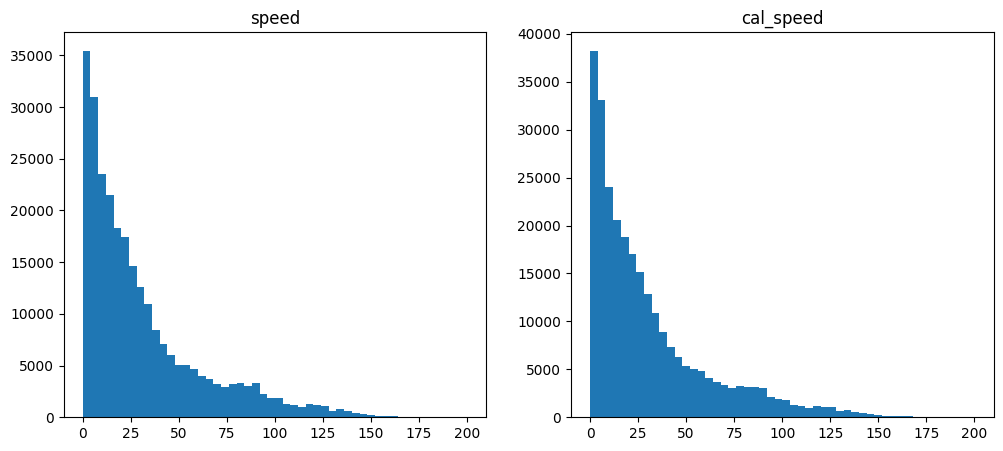

In [431]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.hist(new_prob_data_w1["speed"], bins=50, range=(0,200))
plt.title("speed")

plt.subplot(1,2,2)
plt.hist(new_prob_data_w1["cal_speed"], bins=50, range=(0,200))
plt.title("cal_speed")

plt.show()


In [433]:
# applied it on the second week
#convert type of time
new_prob_data_w2["measuring_time"]=pd.to_datetime(new_prob_data_w2["time"],format="%H:%M:%S")
new_prob_data_w2["time_hours"]=(
    new_prob_data_w2["measuring_time"].dt.hour +
    new_prob_data_w2["measuring_time"].dt.minute /60+
    new_prob_data_w2["measuring_time"].dt.second /3600
)

In [437]:
new_prob_data_w2=new_prob_data_w2.sort_values(
    ["traceid","time_hours"]
)

In [439]:
new_prob_data_w2["prev_lat"]=new_prob_data_w2.groupby("traceid")["latitude"].shift(1)
new_prob_data_w2["prev_lon"]=new_prob_data_w2.groupby("traceid")["longitude"].shift(1)

In [441]:
# المسافه بين كل نقطتين
new_prob_data_w2["step_distance_m"] = haversine(
    new_prob_data_w2["prev_lat"],
    new_prob_data_w2["prev_lon"],
    new_prob_data_w2["latitude"],
    new_prob_data_w2["longitude"]
)

In [443]:
new_prob_data_w2["step_distance_km"] = (
    new_prob_data_w2["step_distance_m"] / 1000
)

In [449]:
# make time col 
new_prob_data_w2["delta_time_h"]=new_prob_data_w2.groupby("traceid")["time_hours"].diff()

In [451]:
new_prob_data_w2["cal_speed"]=new_prob_data_w2["step_distance_km"]/new_prob_data_w2["delta_time_h"]

In [453]:
new_prob_data_w2 = new_prob_data_w2.dropna(subset=["cal_speed"])

In [455]:
speed_data2=new_prob_data_w2[["speed","cal_speed"]].copy()

In [457]:
speed_data2

,speed,cal_speed
240724,8.0,3.755089
240725,2.0,3.841767
240726,10.0,2.337161
240727,34.0,27.263062
240728,37.0,33.189518
...,...,...
140229,29.0,23.920352
140230,13.0,10.126043
140231,9.0,9.381665
140232,NaN,3.274738


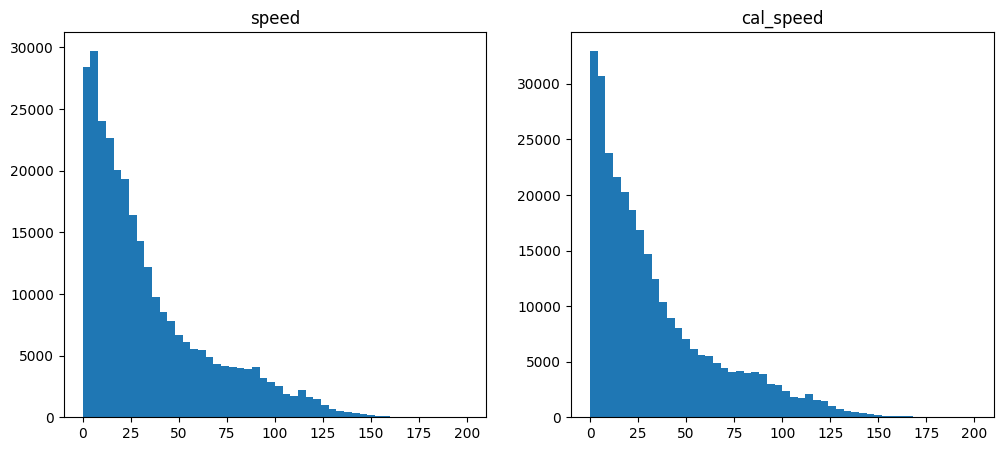

In [459]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.hist(new_prob_data_w2["speed"], bins=50, range=(0,200))
plt.title("speed")

plt.subplot(1,2,2)
plt.hist(new_prob_data_w2["cal_speed"], bins=50, range=(0,200))
plt.title("cal_speed")

plt.show()